In [151]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

# Assuming the CSV file is in the same directory as your Jupyter notebook
file_path = 'stock_market_index_data.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify the import
df.head()

,Date,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),Cocoa (CC=F),Coffee (KC=F),Corn (ZC=F),Cotton (CT=F),Live Cattle (LE=F),Orange Juice (OJ=F),Soybeans (ZS=F),Sugar (SB=F),Wheat (ZW=F),Ethanol (EH=F),Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-Brent (BZ=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Palladium (PA=F),Platinum (PL=F),Silver (SI=F),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
0,1993-11-29,3677.800049,751.539978,461.899994,2697.040039,250.139999,14.12,2052.090088,3135.800049,9012.799805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.075,3.11,5.732,6.226
1,1993-11-30,3683.949951,754.390015,461.790009,2694.080078,250.410004,13.76,2052.919922,3166.899902,9125.200195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.146,3.14,5.795,6.286
2,1993-12-01,3697.080078,763.809998,461.890015,2699.159912,252.610001,13.83,2089.770020,3233.199951,9254.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.132,3.11,5.783,6.268
3,1993-12-02,3702.110107,766.729980,463.109985,2705.179932,252.910004,13.51,2099.760010,3223.899902,9238.200195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.146,3.11,5.778,6.263
4,1993-12-03,3704.070068,772.219971,464.890015,2714.699951,253.860001,12.69,2128.300049,3234.199951,9294.400391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.175,3.11,5.783,6.258


In [152]:
pd.set_option('display.max_columns', None)

# Assuming df is the name of your DataFrame
df

,Date,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),Cocoa (CC=F),Coffee (KC=F),Corn (ZC=F),Cotton (CT=F),Live Cattle (LE=F),Orange Juice (OJ=F),Soybeans (ZS=F),Sugar (SB=F),Wheat (ZW=F),Ethanol (EH=F),Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-Brent (BZ=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Palladium (PA=F),Platinum (PL=F),Silver (SI=F),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
0,1993-11-29,3677.800049,751.539978,461.899994,2697.040039,250.139999,14.12,2052.090088,3135.800049,9012.799805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.075,3.110,5.732,6.226
1,1993-11-30,3683.949951,754.390015,461.790009,2694.080078,250.410004,13.76,2052.919922,3166.899902,9125.200195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.146,3.140,5.795,6.286
2,1993-12-01,3697.080078,763.809998,461.890015,2699.159912,252.610001,13.83,2089.770020,3233.199951,9254.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.132,3.110,5.783,6.268
3,1993-12-02,3702.110107,766.729980,463.109985,2705.179932,252.910004,13.51,2099.760010,3223.899902,9238.200195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.146,3.110,5.778,6.263
4,1993-12-03,3704.070068,772.219971,464.890015,2714.699951,253.860001,12.69,2128.300049,3234.199951,9294.400391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.175,3.110,5.783,6.258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7749,2023-11-23,NaN,NaN,NaN,NaN,NaN,NaN,15994.730469,7483.600098,17910.839844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7750,2023-11-24,35390.148438,14250.849609,4559.339844,15983.820312,1807.500000,12.46,16029.490234,7488.200195,17559.419922,4219.0,178.649994,463.25,80.389999,170.250000,411.100006,1330.75,26.980000,548.75,2.161,2.8357,2.855,80.580002,75.540001,3.7965,2002.199951,1072.800049,931.099976,24.329000,4.492,5.253,4.472,4.603
7751,2023-11-27,35333.468750,14241.019531,4550.430176,15930.889648,1801.150024,12.69,15966.370117,7460.700195,17525.060547,4260.0,179.699997,455.50,78.589996,168.774994,404.299988,1329.75,27.200001,534.25,2.161,2.8379,2.794,79.980003,74.860001,3.7625,2011.800049,1060.500000,917.099976,24.672001,4.413,5.258,4.389,4.533
7752,2023-11-28,35416.980469,14281.759766,4554.890137,15929.150391,1792.810059,12.69,15992.669922,7455.200195,17354.140625,4370.0,183.649994,451.50,78.599998,171.649994,414.299988,1346.50,26.990000,543.75,2.161,2.9070,2.706,81.680000,76.410004,3.8010,2039.699951,1057.400024,944.099976,24.930000,4.286,5.260,4.336,4.524


In [153]:
# Assuming 'Sugar (SB=F)' is the column you want to check for null values
column_to_check = 'Sugar (SB=F)'

# Drop rows where 'Sugar (SB=F)' is null
df = df.dropna(subset=[column_to_check])

# Resetting the index after dropping rows
df = df.reset_index(drop=True)


In [154]:
# List of columns to convert to numeric
columns_to_convert = ['Dow Jones (^DJI)', 'Nasdaq (^IXIC)', 'S&P500 (^GSPC)', 'NYSE Composite (^NYA)', 'Russell 2000 (^RUT)',
                      'CBOE Volitility (^VIX)', 'DAX Index (^GDAXI)', 'FTSE 100 (^FTSE)', 'Hang Seng Index (^HSI)',
                      'Cocoa (CC=F)', 'Coffee (KC=F)', 'Corn (ZC=F)', 'Cotton (CT=F)', 'Live Cattle (LE=F)',
                      'Orange Juice (OJ=F)', 'Soybeans (ZS=F)', 'Sugar (SB=F)', 'Wheat (ZW=F)', 'Ethanol (EH=F)',
                      'Heating Oil (HO=F)', 'Natural Gas (NG=F)', 'Crude Oil-Brent (BZ=F)', 'Crude Oil-WTI (CL=F)',
                      'Copper (HG=F)', 'Gold (GC=F)', 'Palladium (PA=F)', 'Platinum (PL=F)', 'Silver (SI=F)',
                      'Treasury Yield 5 Years (^FVX)', 'Treasury Bill 13 Week (^IRX)', 'Treasury Yield 10 Years (^TNX)',
                      'Treasury Yield 30 Years (^TYX)']

# Convert specified columns to numeric
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [155]:
df

,Date,Dow Jones (^DJI),Nasdaq (^IXIC),S&P500 (^GSPC),NYSE Composite (^NYA),Russell 2000 (^RUT),CBOE Volitility (^VIX),DAX Index (^GDAXI),FTSE 100 (^FTSE),Hang Seng Index (^HSI),Cocoa (CC=F),Coffee (KC=F),Corn (ZC=F),Cotton (CT=F),Live Cattle (LE=F),Orange Juice (OJ=F),Soybeans (ZS=F),Sugar (SB=F),Wheat (ZW=F),Ethanol (EH=F),Heating Oil (HO=F),Natural Gas (NG=F),Crude Oil-Brent (BZ=F),Crude Oil-WTI (CL=F),Copper (HG=F),Gold (GC=F),Palladium (PA=F),Platinum (PL=F),Silver (SI=F),Treasury Yield 5 Years (^FVX),Treasury Bill 13 Week (^IRX),Treasury Yield 10 Years (^TNX),Treasury Yield 30 Years (^TYX)
0,2000-03-01,10137.929688,4784.080078,1379.189941,6338.740234,588.349976,21.639999,7727.930176,6364.899902,16843.589844,759.0,101.150002,NaN,59.500000,NaN,NaN,NaN,5.080000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,690.900024,467.200012,NaN,6.561,5.600,6.379,6.151
1,2000-03-02,10164.919922,4754.509766,1381.760010,6360.100098,584.039978,21.059999,7945.770020,6432.100098,16936.810547,791.0,105.099998,NaN,58.650002,NaN,NaN,NaN,4.960000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,665.400024,452.500000,NaN,6.601,5.590,6.396,6.144
2,2000-03-03,10367.200195,4914.790039,1409.170044,6454.950195,597.880005,19.209999,7960.029785,6487.500000,17285.240234,805.0,104.349998,NaN,59.049999,NaN,NaN,NaN,5.050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,655.000000,463.500000,NaN,6.579,5.630,6.371,6.117
3,2000-03-06,10170.500000,4904.850098,1391.280029,6386.740234,601.640015,21.500000,7975.779785,6567.799805,17758.759766,802.0,106.300003,NaN,59.400002,NaN,NaN,NaN,5.040000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,660.000000,464.100006,NaN,6.627,5.650,6.409,6.144
4,2000-03-07,9796.030273,4847.839844,1355.619995,6223.379883,595.469971,24.309999,8064.970215,6466.500000,17865.359375,819.0,108.400002,NaN,59.650002,NaN,NaN,NaN,5.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,665.500000,469.000000,NaN,6.587,5.650,6.383,6.148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,2023-11-22,35273.031250,14265.860352,4556.620117,15907.889648,1795.540039,12.850000,15957.820312,7469.500000,17734.599609,4173.0,178.649994,468.75,79.580002,174.475006,420.700012,1356.50,27.219999,555.75,2.161,2.8891,2.897,81.959999,77.099998,3.7665,1991.400024,1054.199951,924.599976,23.672001,4.440,5.265,4.416,4.547
5951,2023-11-24,35390.148438,14250.849609,4559.339844,15983.820312,1807.500000,12.460000,16029.490234,7488.200195,17559.419922,4219.0,178.649994,463.25,80.389999,170.250000,411.100006,1330.75,26.980000,548.75,2.161,2.8357,2.855,80.580002,75.540001,3.7965,2002.199951,1072.800049,931.099976,24.329000,4.492,5.253,4.472,4.603
5952,2023-11-27,35333.468750,14241.019531,4550.430176,15930.889648,1801.150024,12.690000,15966.370117,7460.700195,17525.060547,4260.0,179.699997,455.50,78.589996,168.774994,404.299988,1329.75,27.200001,534.25,2.161,2.8379,2.794,79.980003,74.860001,3.7625,2011.800049,1060.500000,917.099976,24.672001,4.413,5.258,4.389,4.533
5953,2023-11-28,35416.980469,14281.759766,4554.890137,15929.150391,1792.810059,12.690000,15992.669922,7455.200195,17354.140625,4370.0,183.649994,451.50,78.599998,171.649994,414.299988,1346.50,26.990000,543.75,2.161,2.9070,2.706,81.680000,76.410004,3.8010,2039.699951,1057.400024,944.099976,24.930000,4.286,5.260,4.336,4.524


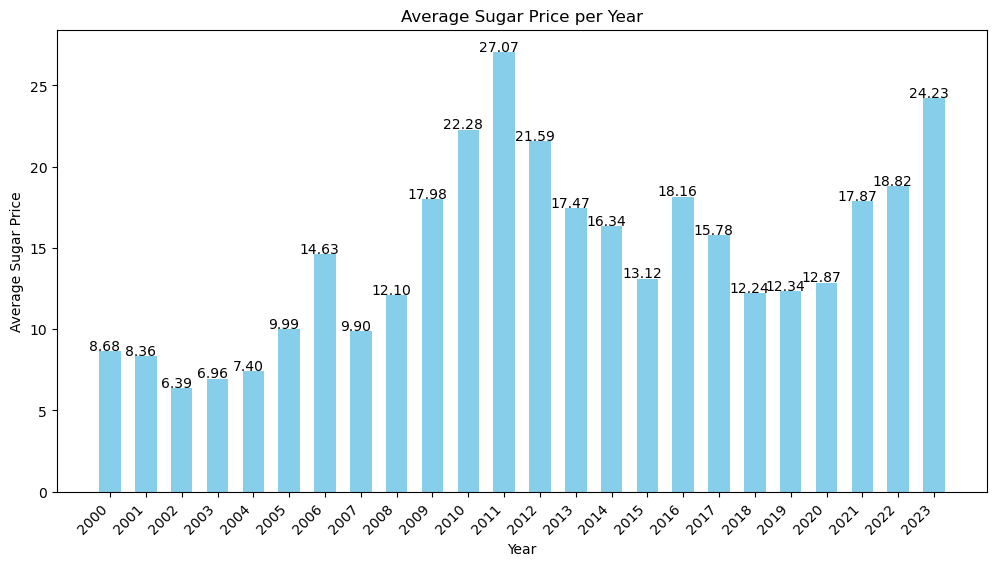

In [165]:
# Assuming df is the name of your DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.to_period('Y')  # Group by year

# Group by year and calculate the average for 'Sugar (SB=F)'
average_sugar_per_year = df.groupby('Year')['Sugar (SB=F)'].mean()

# Create a bar graph with annotations and increased separation
plt.figure(figsize=(12, 6))  # Adjust the figure size
bars = plt.bar(average_sugar_per_year.index.astype(str), average_sugar_per_year, color='skyblue', width=0.6)  # Adjust the width

# Add annotations with average sugar prices
for bar, avg_sugar in zip(bars, average_sugar_per_year):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.05, f'{avg_sugar:.2f}', ha='center', color='black')

plt.xlabel('Year')
plt.ylabel('Average Sugar Price')
plt.title('Average Sugar Price per Year')
plt.xticks(rotation=45, ha='right')
plt.show()

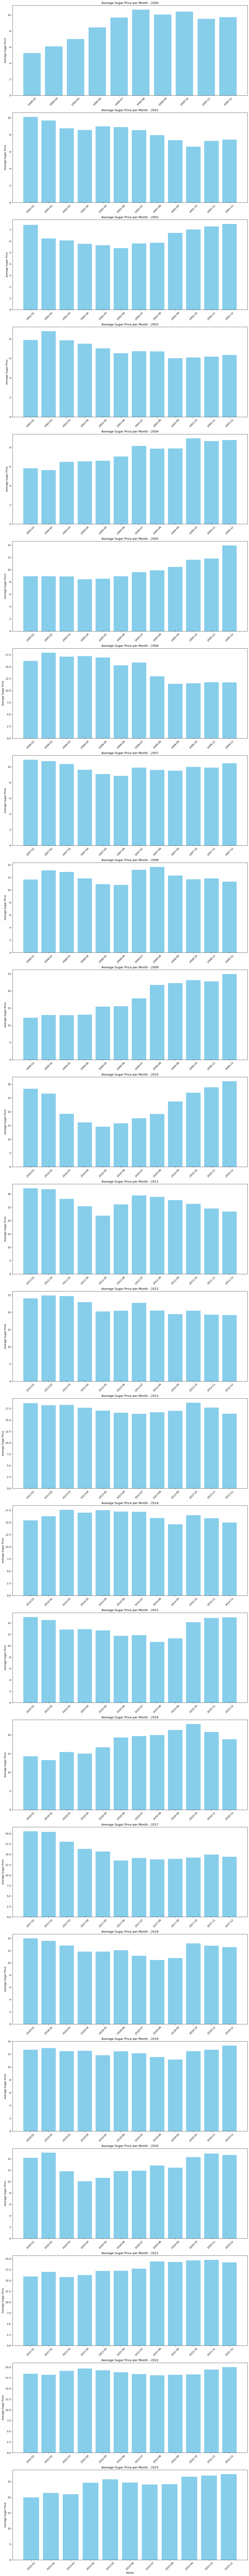

In [157]:
# Assuming df is the name of your DataFrame
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')  # Group by year and month

# Group by year and month and calculate the average for 'Sugar (SB=F)'
average_sugar_per_month = df.groupby('YearMonth')['Sugar (SB=F)'].mean()

# Create subplots for each year
fig, axs = plt.subplots(len(average_sugar_per_month.index.year.unique()), 1, figsize=(14, 6 * len(average_sugar_per_month.index.year.unique())))

# Iterate over each year and plot the average sugar prices for each month
for i, year in enumerate(average_sugar_per_month.index.year.unique()):
    year_data = average_sugar_per_month[average_sugar_per_month.index.year == year]
    axs[i].bar(year_data.index.astype(str), year_data, color='skyblue')
    axs[i].set_title(f'Average Sugar Price per Month - {year}')
    axs[i].set_ylabel('Average Sugar Price')
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.xlabel('Month')
plt.tight_layout()
plt.show()

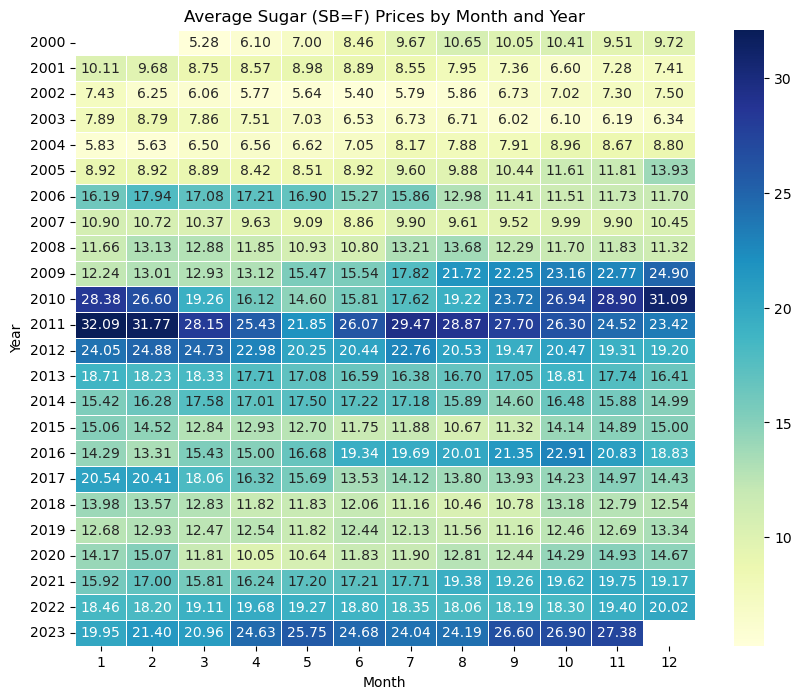

In [164]:
# Assuming df is the name of your DataFrame
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Group by Year and Month, calculate the mean for the 'Sugar (SB=F)' column
monthly_avg_sugar = df.groupby(['Year', 'Month'])['Sugar (SB=F)'].mean().reset_index()

# Pivot the table for heatmap
heatmap_data = monthly_avg_sugar.pivot(index='Year', columns='Month', values='Sugar (SB=F)')

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=.5)
plt.title('Average Sugar (SB=F) Prices by Month and Year')
plt.show()

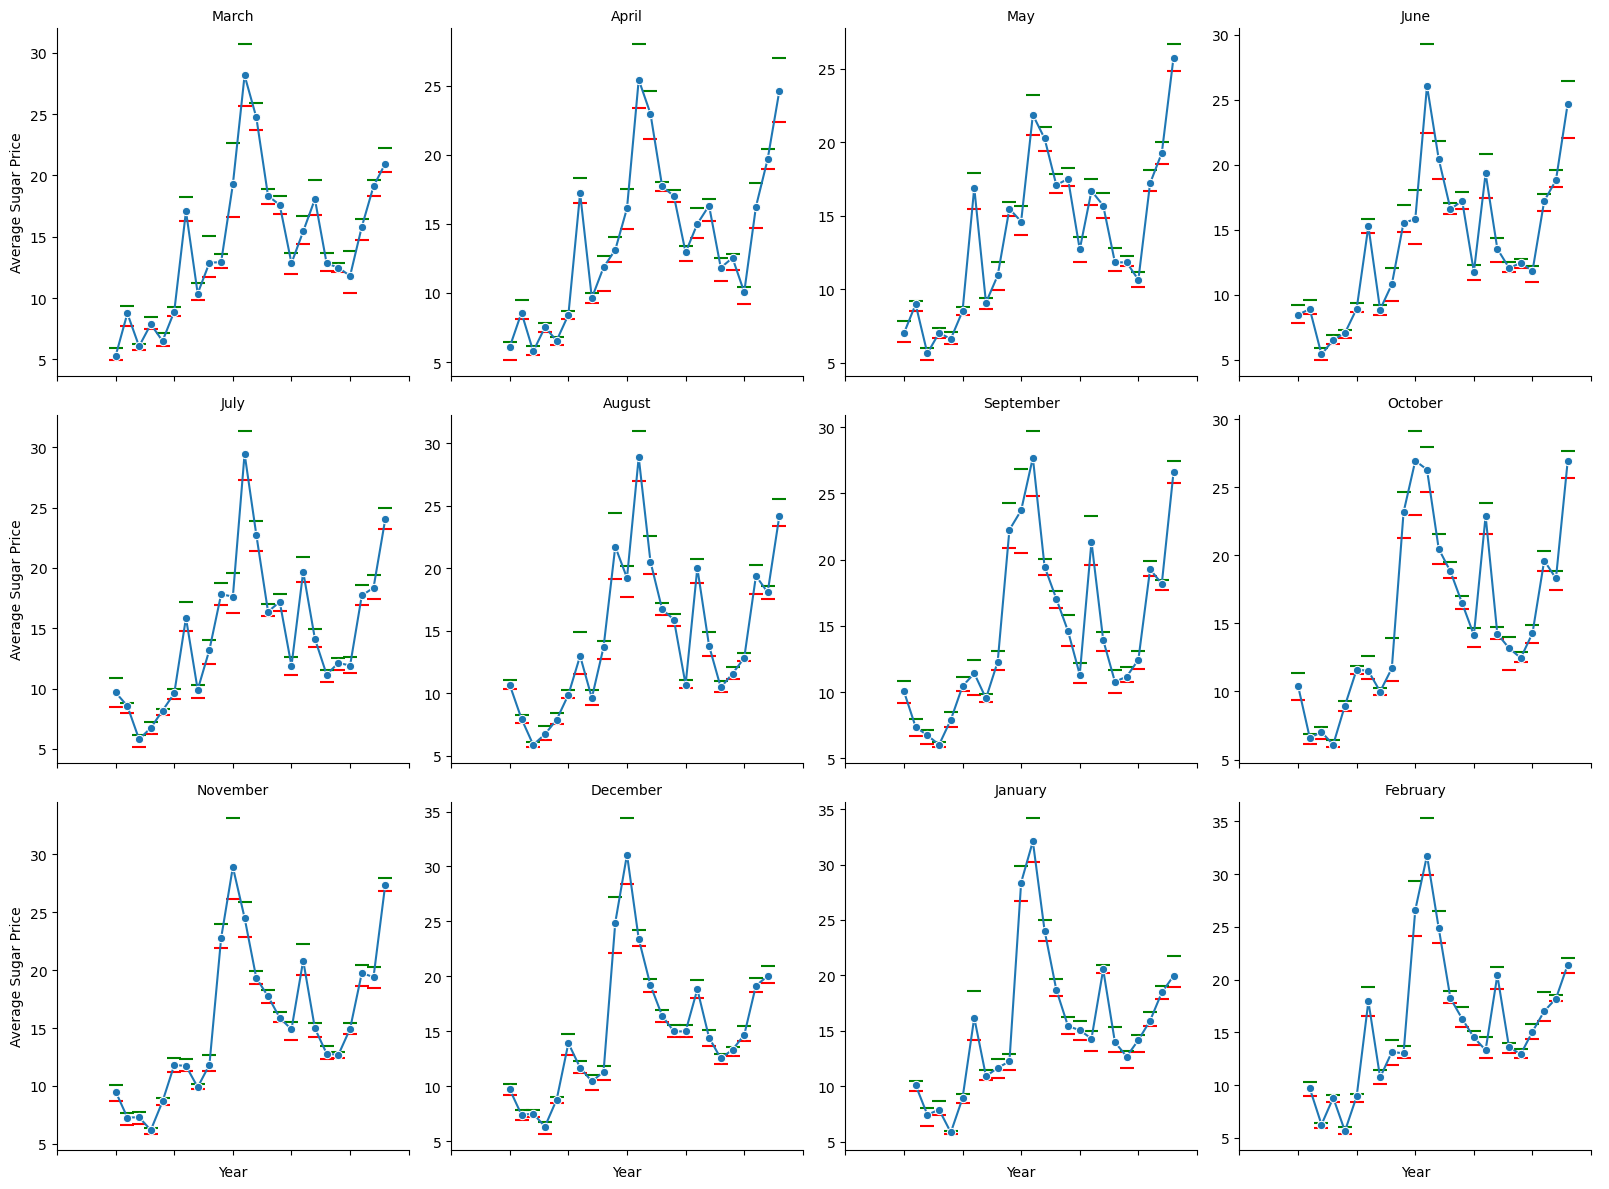

In [161]:
# Assuming df is the name of your DataFrame
df['Date'] = pd.to_datetime(df['Date'])

# Extract month and year from the 'Date' column
df['Month'] = df['Date'].dt.month_name()  # Extract the month name
df['Year'] = df['Date'].dt.year  # Extract the year

# Calculate min and max for each month
monthly_min_max = df.groupby(['Month', 'Year'])['Sugar (SB=F)'].agg(['min', 'max']).reset_index()

# Create a FacetGrid for subplots, each one representing a different month
g = sns.FacetGrid(df, col='Month', col_wrap=4, height=4, sharey=False)
g.map(sns.lineplot, 'Year', 'Sugar (SB=F)', marker='o', palette='viridis', ci=None)

# Plot scatter points for min and max values
for month, ax in zip(df['Month'].unique(), g.axes):
    month_data = monthly_min_max[monthly_min_max['Month'] == month]
    ax.scatter(month_data['Year'], month_data['min'], color='red', marker='_', s=100, label='Min')
    ax.scatter(month_data['Year'], month_data['max'], color='green', marker='_', s=100, label='Max')

# Set titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels('Year', 'Average Sugar Price')
g.set_xticklabels(rotation=45)
g.add_legend()

plt.tight_layout()
plt.show()

In [115]:
# Group by year and calculate the average for 'Sugar (SB=F)'
average_sugar_per_year = df.groupby('Year')['Sugar (SB=F)'].mean()

# Get the maximum and minimum average of 'Sugar (SB=F)'
max_avg_sugar = average_sugar_per_year.max()
min_avg_sugar = average_sugar_per_year.min()

print("Maximum Average Sugar Price:", max_avg_sugar)
print("Minimum Average Sugar Price:", min_avg_sugar)

Maximum Average Sugar Price: 27.074342704864137
Minimum Average Sugar Price: 6.387228906394009


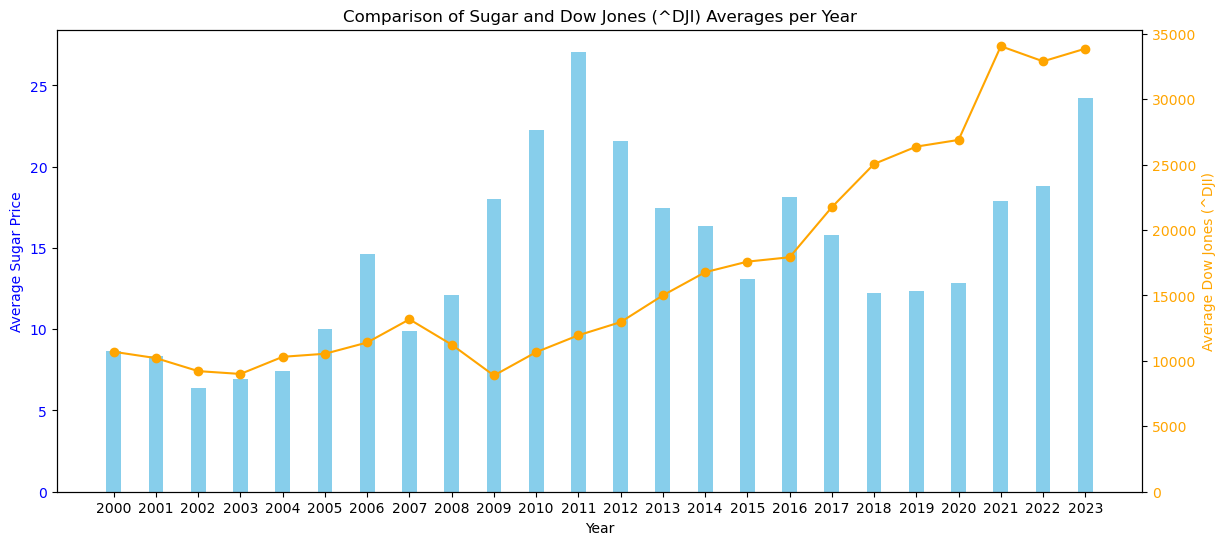

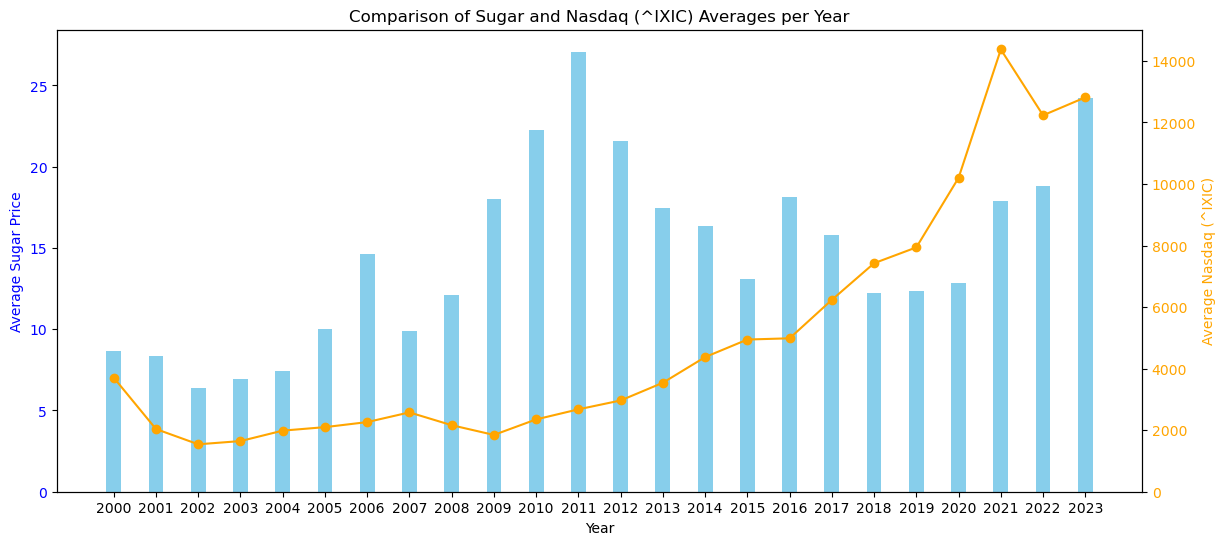

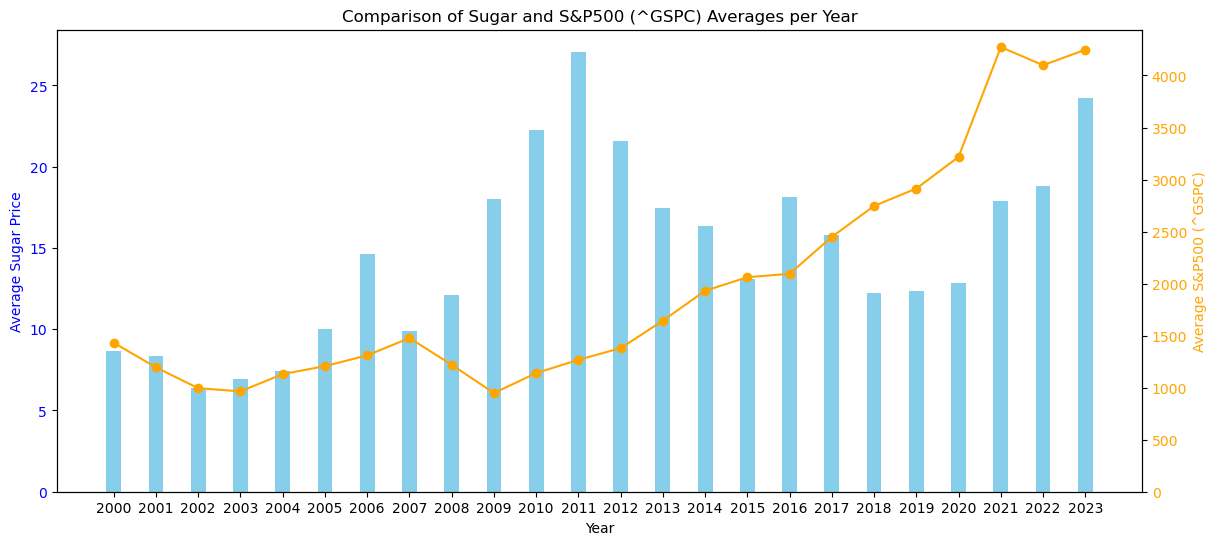

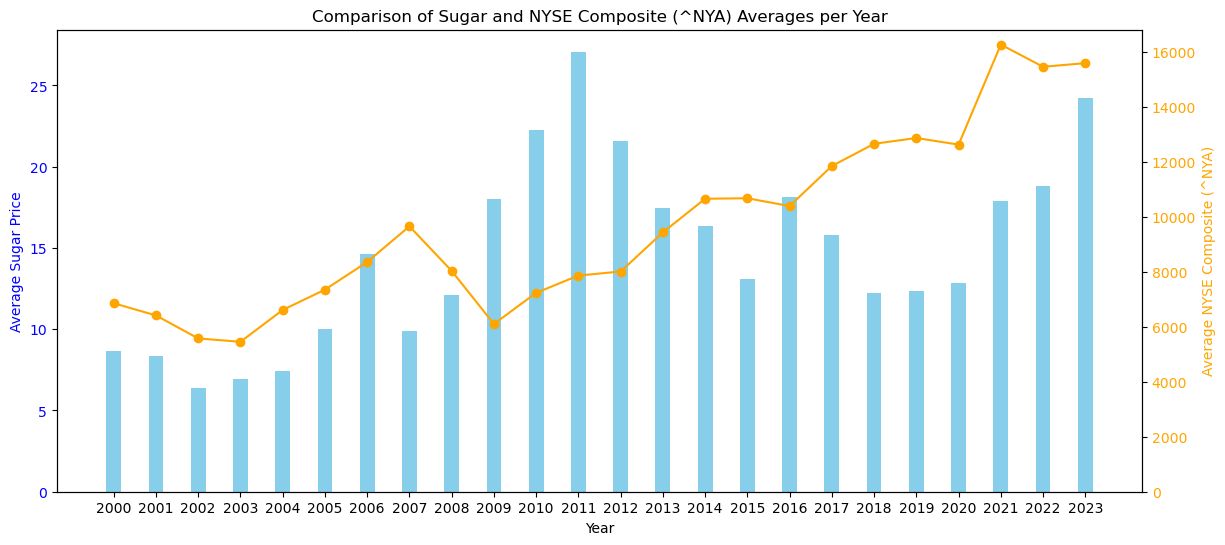

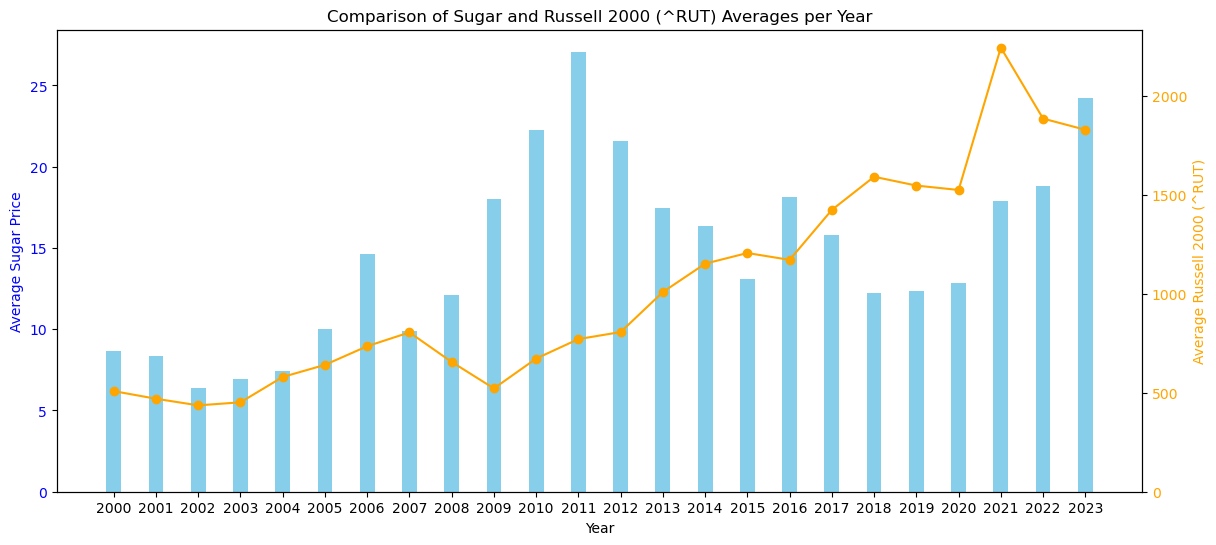

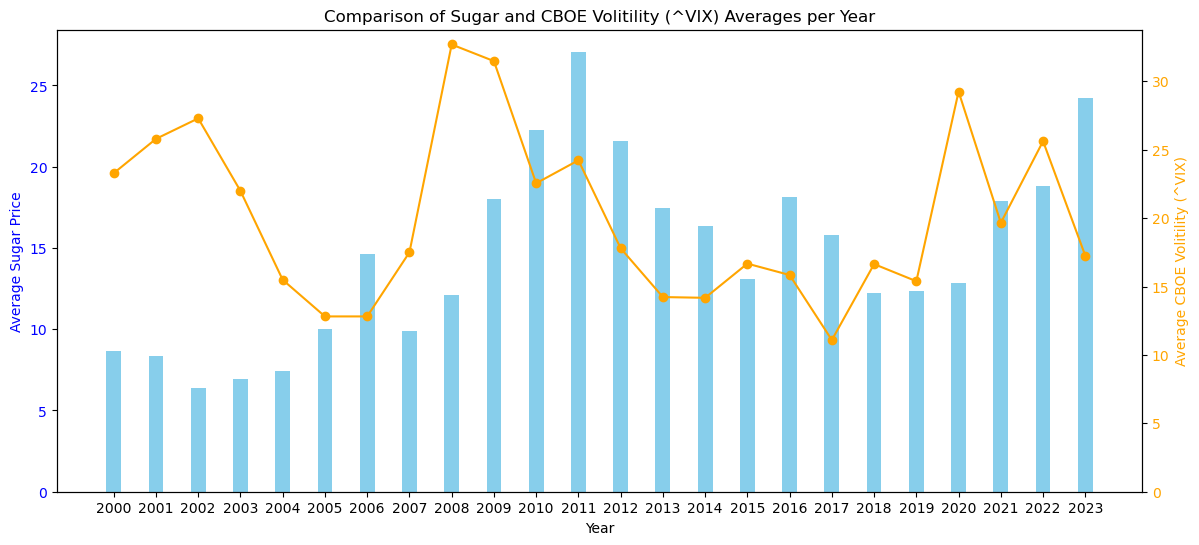

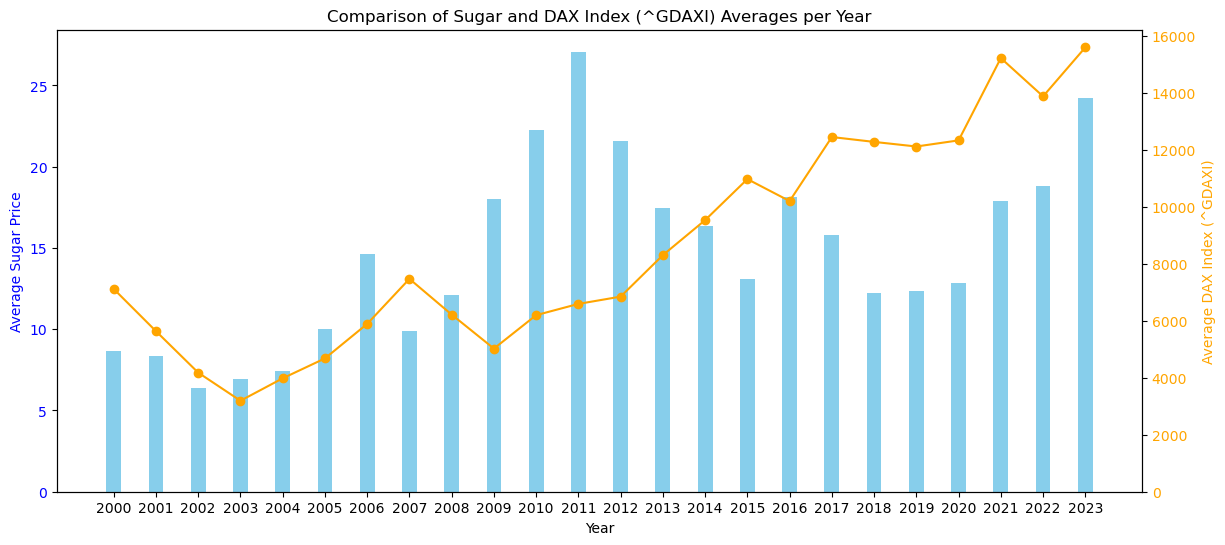

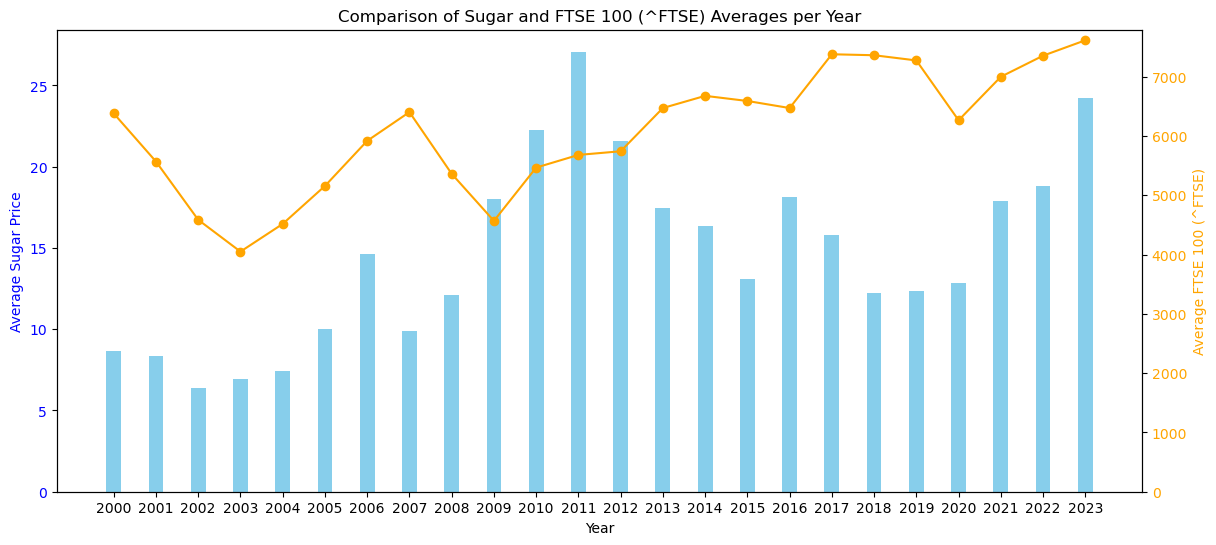

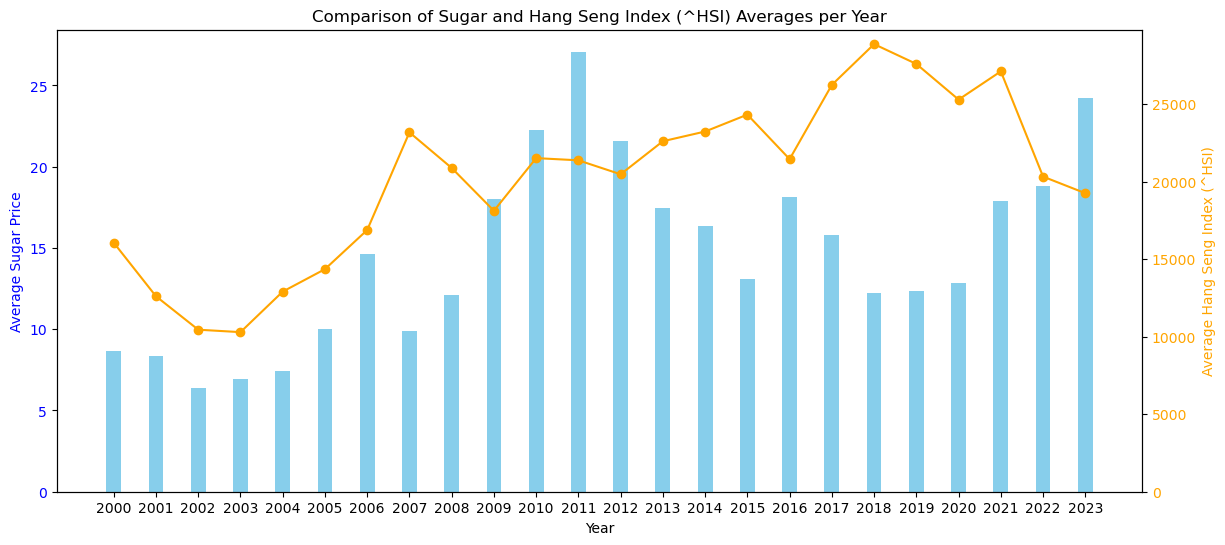

In [116]:
# Select columns for analysis
columns_of_interest = [
    'Dow Jones (^DJI)', 'Nasdaq (^IXIC)',
    'S&P500 (^GSPC)', 'NYSE Composite (^NYA)', 'Russell 2000 (^RUT)',
    'CBOE Volitility (^VIX)', 'DAX Index (^GDAXI)', 'FTSE 100 (^FTSE)', 'Hang Seng Index (^HSI)',
]

# Iterate over each column for comparison with 'Sugar (SB=F)'
for column in columns_of_interest:
    # Group by year and calculate the average for 'Sugar (SB=F)' and the current column
    average_sugar_per_year = df.groupby('Year')['Sugar (SB=F)'].mean()
    average_column_per_year = df.groupby('Year')[column].mean()

    # Create a bar graph with dual y-axes and increased separation
    fig, ax1 = plt.subplots(figsize=(14, 6))  # Increased figure size

    # Plot 'Sugar (SB=F)' on the left y-axis with increased separation
    bar_width = 0.35
    bar_positions_sugar = average_sugar_per_year.index.astype(str).astype(int)  # Align with numeric x-values
    ax1.bar(bar_positions_sugar, average_sugar_per_year, width=bar_width, color='skyblue', label='Sugar (SB=F)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Sugar Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(bar_positions_sugar)
    ax1.set_xticklabels(average_sugar_per_year.index.astype(str))
    ax1.set_ylim(0)  # Set y-axis starting point to zero

    # Create a secondary y-axis for the current column
    ax2 = ax1.twinx()
    ax2.plot(bar_positions_sugar, average_column_per_year, color='orange', marker='o', label=column)
    ax2.set_ylabel(f'Average {column}', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.set_ylim(0)  # Set y-axis starting point to zero

    plt.title(f'Comparison of Sugar and {column} Averages per Year')
    plt.show()

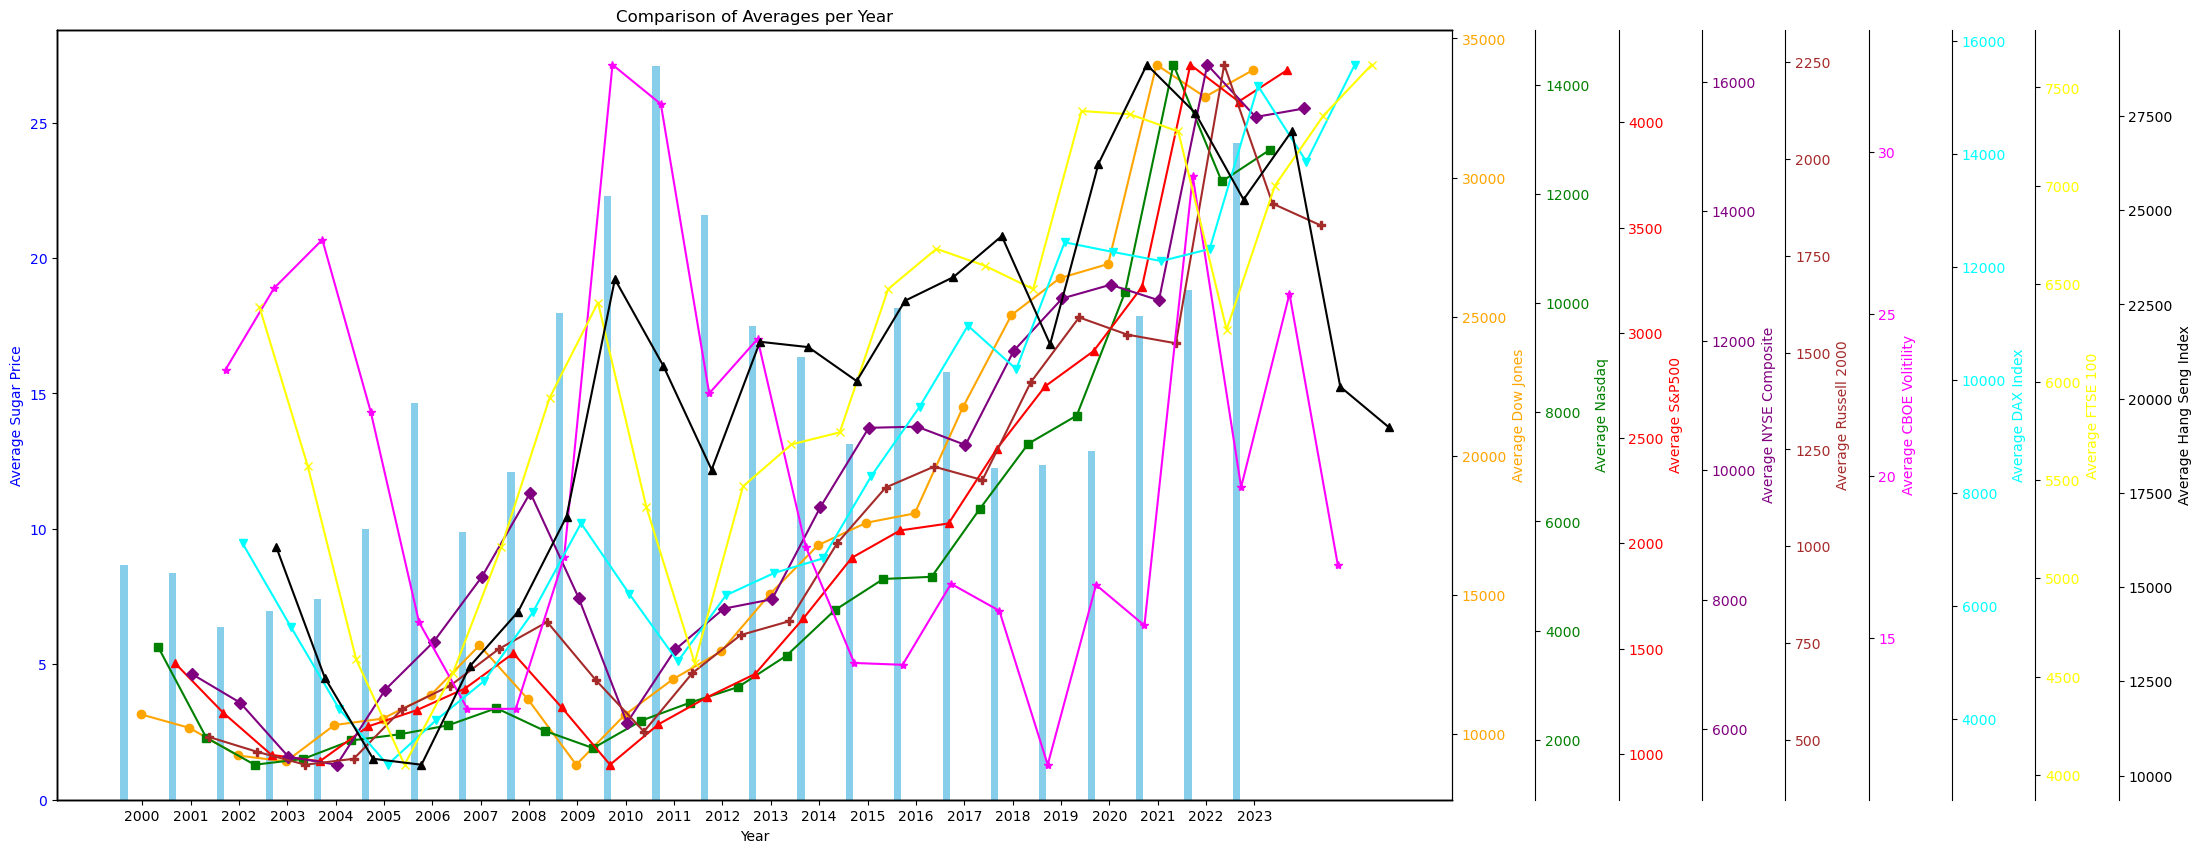

In [117]:
# Group by year and calculate the average for selected columns
average_sugar_per_year = df.groupby('Year')['Sugar (SB=F)'].mean()
average_dow_jones_per_year = df.groupby('Year')['Dow Jones (^DJI)'].mean()
average_nasdaq_per_year = df.groupby('Year')['Nasdaq (^IXIC)'].mean()
average_sp500_per_year = df.groupby('Year')['S&P500 (^GSPC)'].mean()
average_nyse_per_year = df.groupby('Year')['NYSE Composite (^NYA)'].mean()
average_russell2000_per_year = df.groupby('Year')['Russell 2000 (^RUT)'].mean()
average_cboe_volatility_per_year = df.groupby('Year')['CBOE Volitility (^VIX)'].mean()
average_dax_index_per_year = df.groupby('Year')['DAX Index (^GDAXI)'].mean()
average_ftse_100_per_year = df.groupby('Year')['FTSE 100 (^FTSE)'].mean()
average_hang_seng_index_per_year = df.groupby('Year')['Hang Seng Index (^HSI)'].mean()

# Create a bar graph with dual y-axes and increased separation
fig, ax1 = plt.subplots(figsize=(18, 10))  # Increased figure size

# Plot 'Sugar (SB=F)' on the left y-axis with increased separation
bar_width = 0.15
bar_positions_sugar = np.arange(len(average_sugar_per_year))
bar_positions_dow_jones = bar_positions_sugar + bar_width + 0.2
bar_positions_nasdaq = bar_positions_sugar + 2 * bar_width + 0.4
bar_positions_sp500 = bar_positions_sugar + 3 * bar_width + 0.6
bar_positions_nyse = bar_positions_sugar + 4 * bar_width + 0.8
bar_positions_russell2000 = bar_positions_sugar + 5 * bar_width + 1.0
bar_positions_cboe_volatility = bar_positions_sugar + 6 * bar_width + 1.2
bar_positions_dax_index = bar_positions_sugar + 7 * bar_width + 1.4
bar_positions_ftse_100 = bar_positions_sugar + 8 * bar_width + 1.6
bar_positions_hang_seng_index = bar_positions_sugar + 9 * bar_width + 1.8

ax1.bar(bar_positions_sugar, average_sugar_per_year, width=bar_width, color='skyblue', label='Sugar (SB=F)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Sugar Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_xticks(bar_positions_sugar + 5 * bar_width / 2)
ax1.set_xticklabels(average_sugar_per_year.index.astype(str))

# Create secondary y-axes for the additional columns
ax2 = ax1.twinx()
ax2.plot(bar_positions_dow_jones, average_dow_jones_per_year, color='orange', marker='o', label='Dow Jones (^DJI)')
ax2.set_ylabel('Average Dow Jones', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(bar_positions_nasdaq, average_nasdaq_per_year, color='green', marker='s', label='Nasdaq (^IXIC)')
ax3.set_ylabel('Average Nasdaq', color='green')
ax3.tick_params(axis='y', labelcolor='green')

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.plot(bar_positions_sp500, average_sp500_per_year, color='red', marker='^', label='S&P500 (^GSPC)')
ax4.set_ylabel('Average S&P500', color='red')
ax4.tick_params(axis='y', labelcolor='red')

ax5 = ax1.twinx()
ax5.spines['right'].set_position(('outward', 180))
ax5.plot(bar_positions_nyse, average_nyse_per_year, color='purple', marker='D', label='NYSE Composite (^NYA)')
ax5.set_ylabel('Average NYSE Composite', color='purple')
ax5.tick_params(axis='y', labelcolor='purple')

ax6 = ax1.twinx()
ax6.spines['right'].set_position(('outward', 240))
ax6.plot(bar_positions_russell2000, average_russell2000_per_year, color='brown', marker='P', label='Russell 2000 (^RUT)')
ax6.set_ylabel('Average Russell 2000', color='brown')
ax6.tick_params(axis='y', labelcolor='brown')

ax7 = ax1.twinx()
ax7.spines['right'].set_position(('outward', 300))
ax7.plot(bar_positions_cboe_volatility, average_cboe_volatility_per_year, color='magenta', marker='*', label='CBOE Volatility (^VIX)')
ax7.set_ylabel('Average CBOE Volitility', color='magenta')
ax7.tick_params(axis='y', labelcolor='magenta')

ax8 = ax1.twinx()
ax8.spines['right'].set_position(('outward', 360))
ax8.plot(bar_positions_dax_index, average_dax_index_per_year, color='cyan', marker='v', label='DAX Index (^GDAXI)')
ax8.set_ylabel('Average DAX Index', color='cyan')
ax8.tick_params(axis='y', labelcolor='cyan')

ax9 = ax1.twinx()
ax9.spines['right'].set_position(('outward', 420))
ax9.plot(bar_positions_ftse_100, average_ftse_100_per_year, color='yellow', marker='x', label='FTSE 100 (^FTSE)')
ax9.set_ylabel('Average FTSE 100', color='yellow')
ax9.tick_params(axis='y', labelcolor='yellow')

ax10 = ax1.twinx()
ax10.spines['right'].set_position(('outward', 480))
ax10.plot(bar_positions_hang_seng_index, average_hang_seng_index_per_year, color='black', marker='^', label='Hang Seng Index (^HSI)')
ax10.set_ylabel('Average Hang Seng Index', color='black')
ax10.tick_params(axis='y', labelcolor='black')

plt.title('Comparison of Averages per Year')
plt.show()

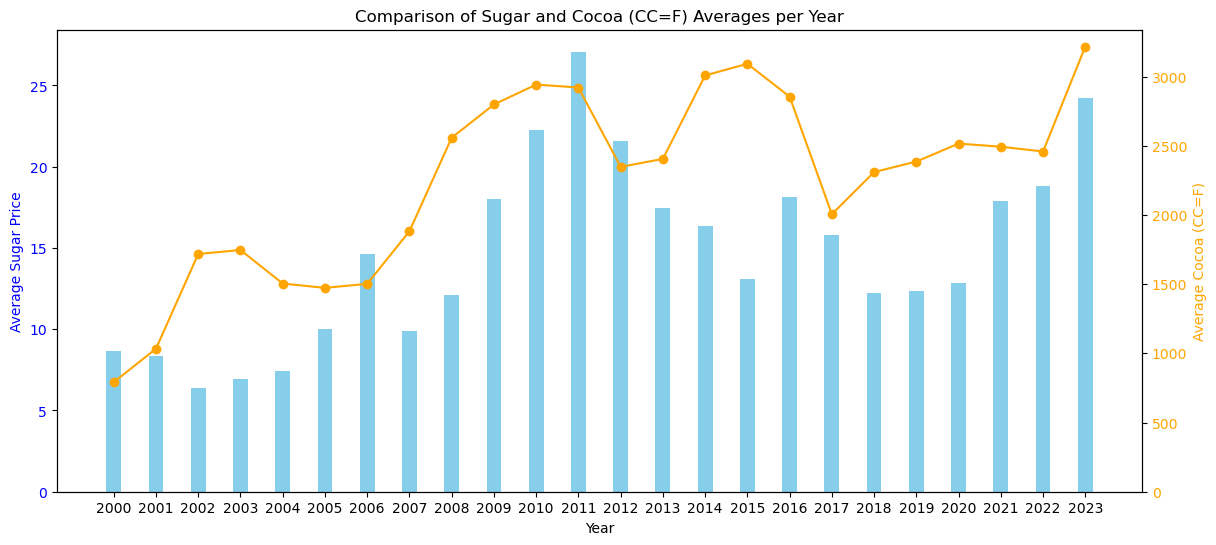

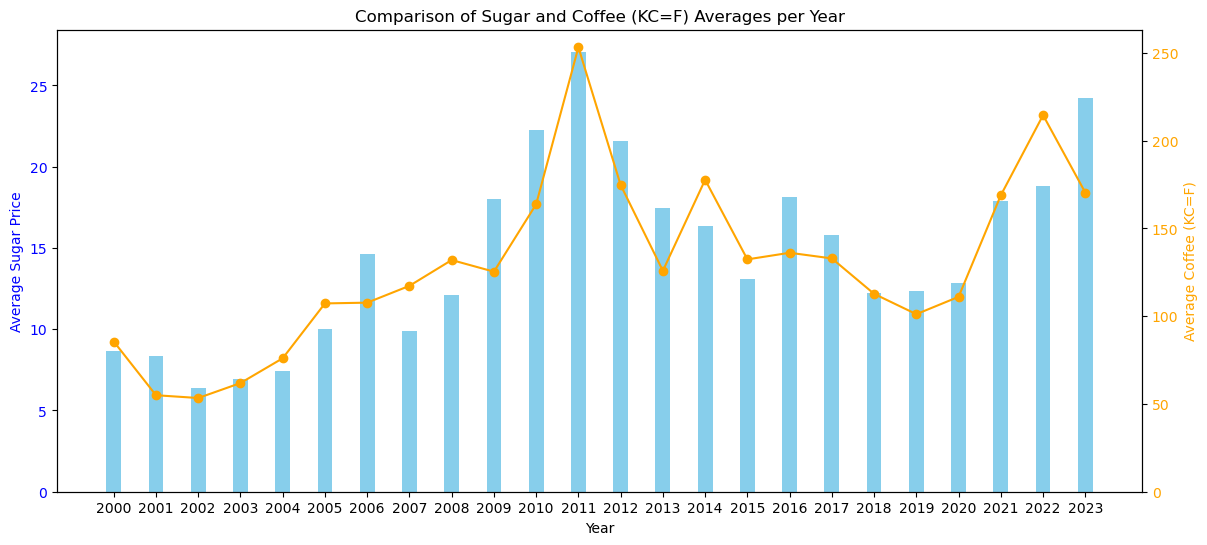

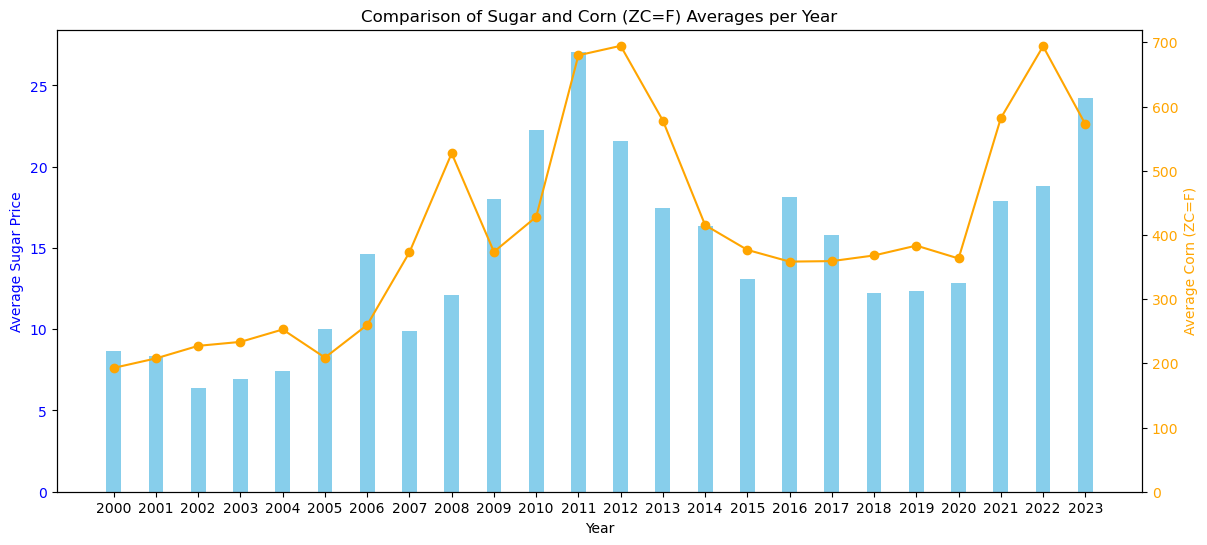

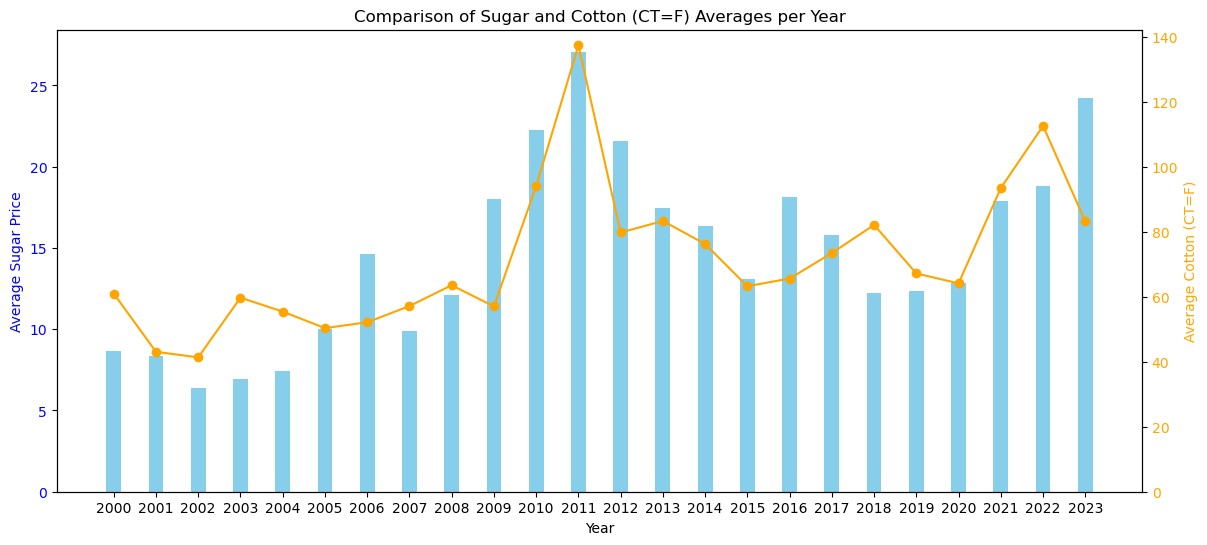

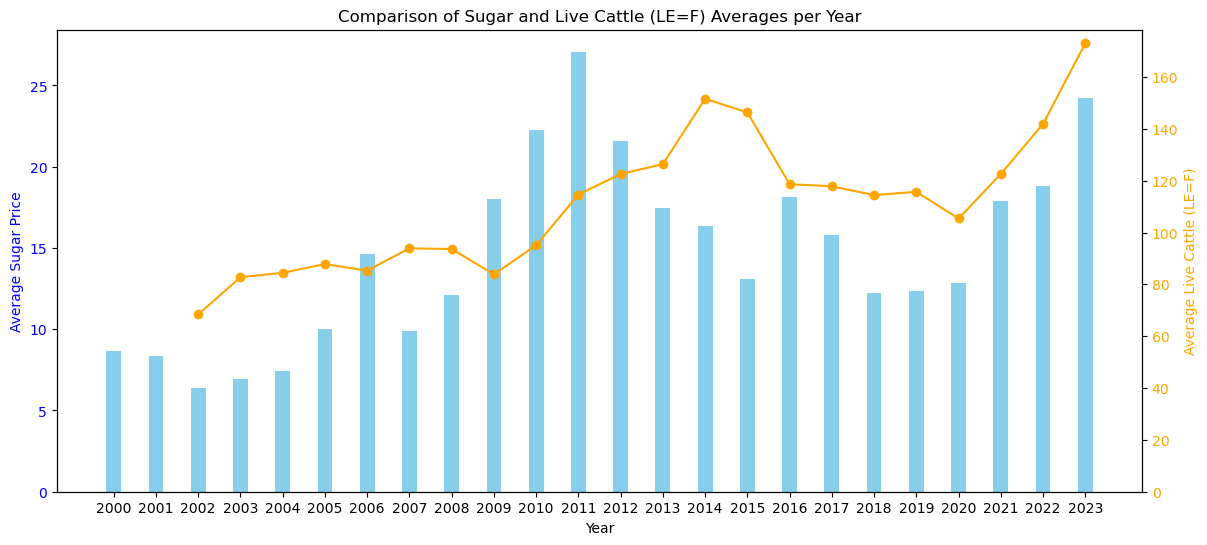

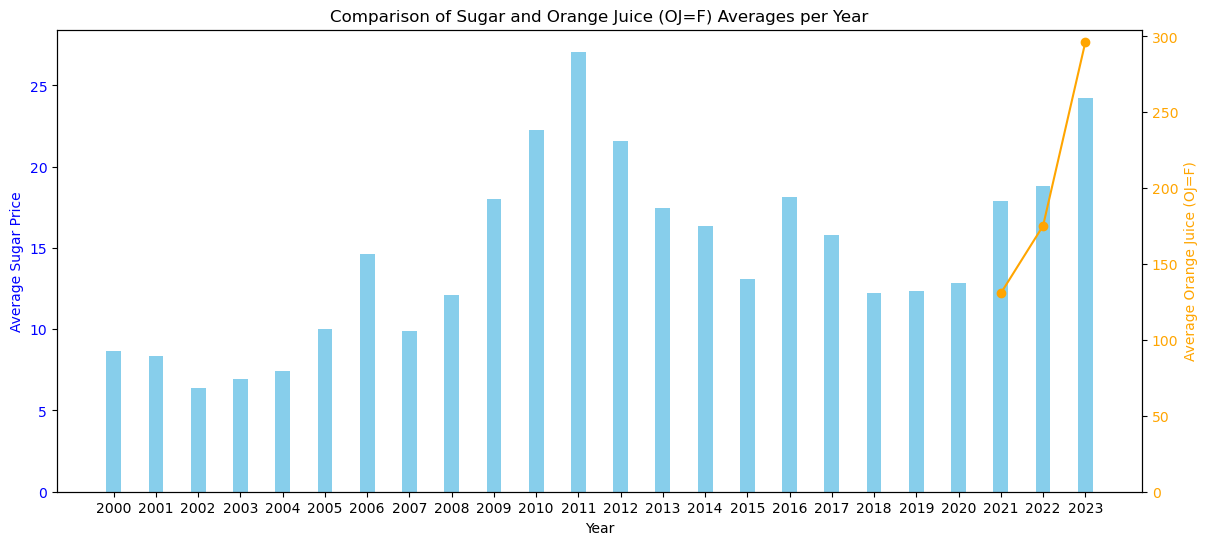

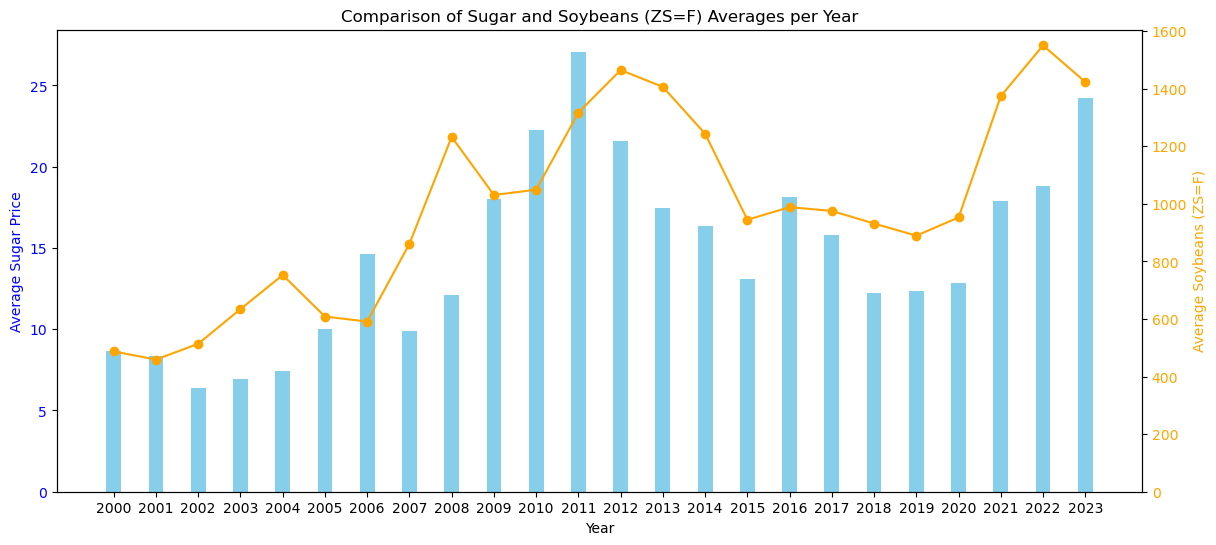

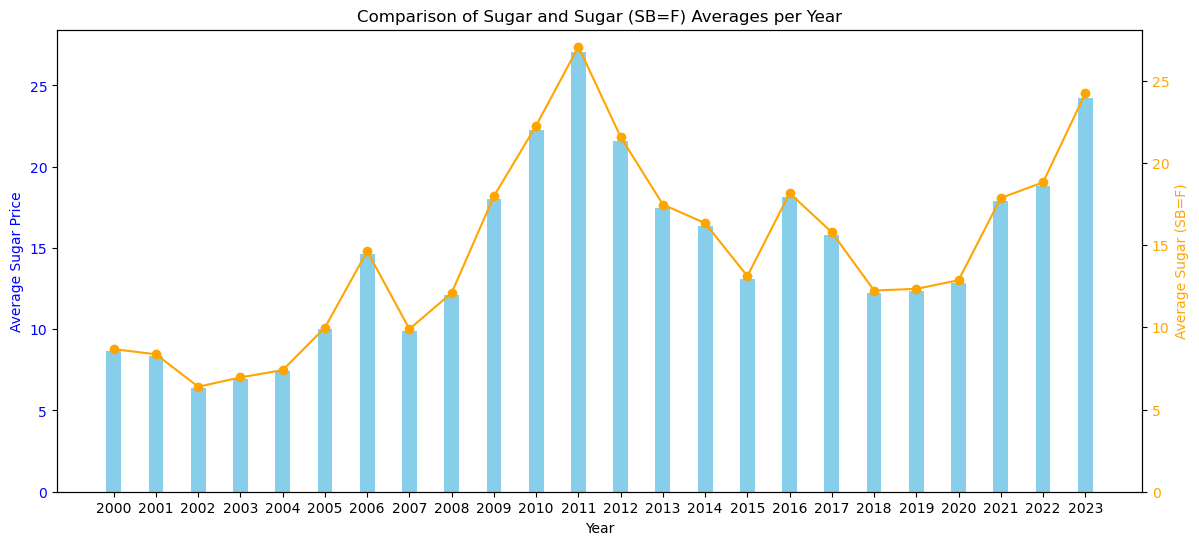

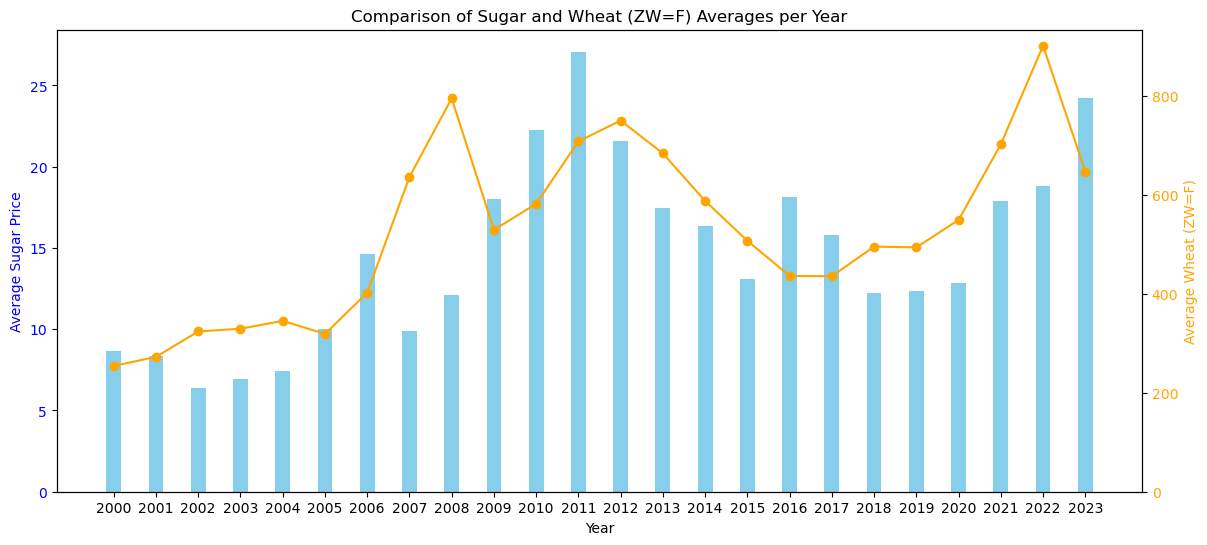

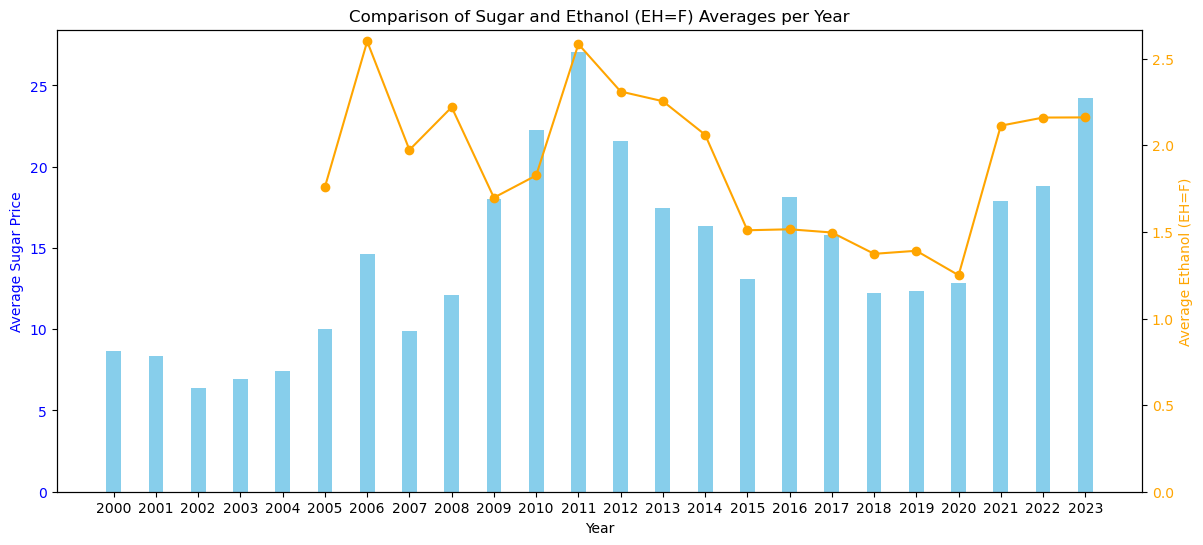

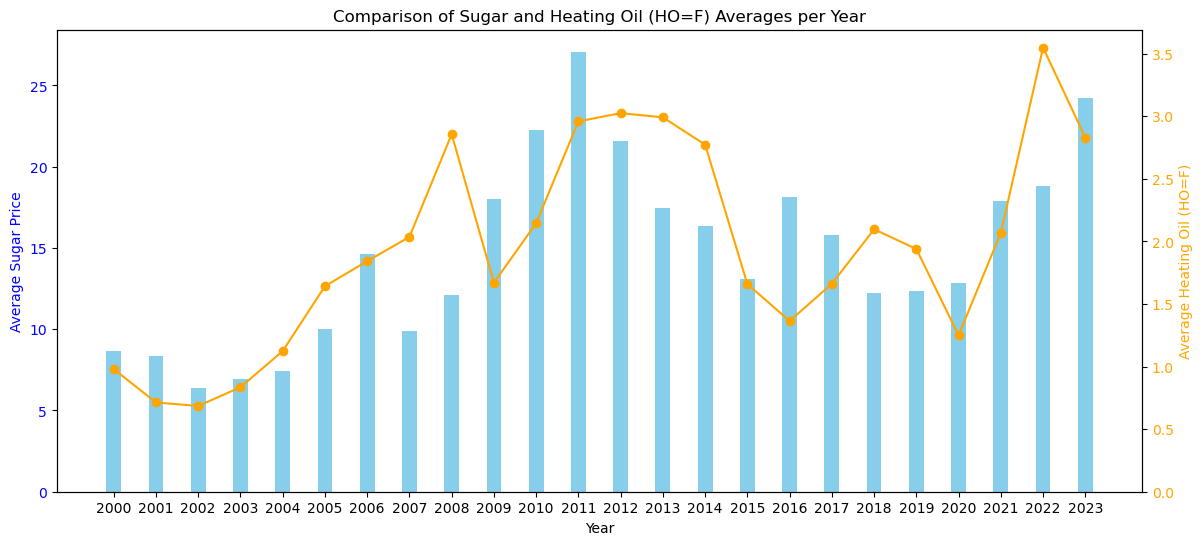

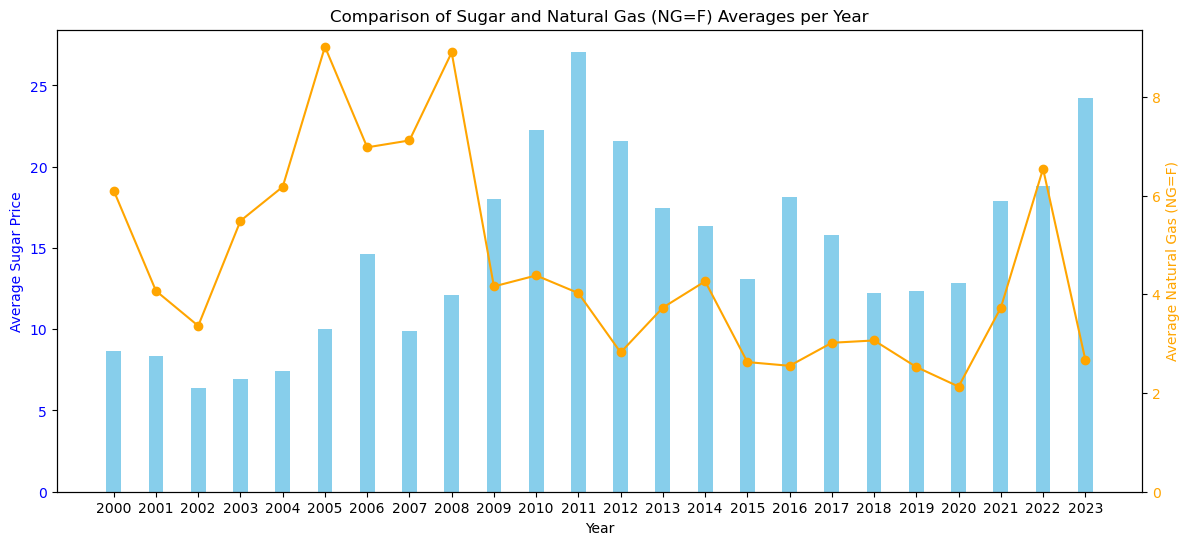

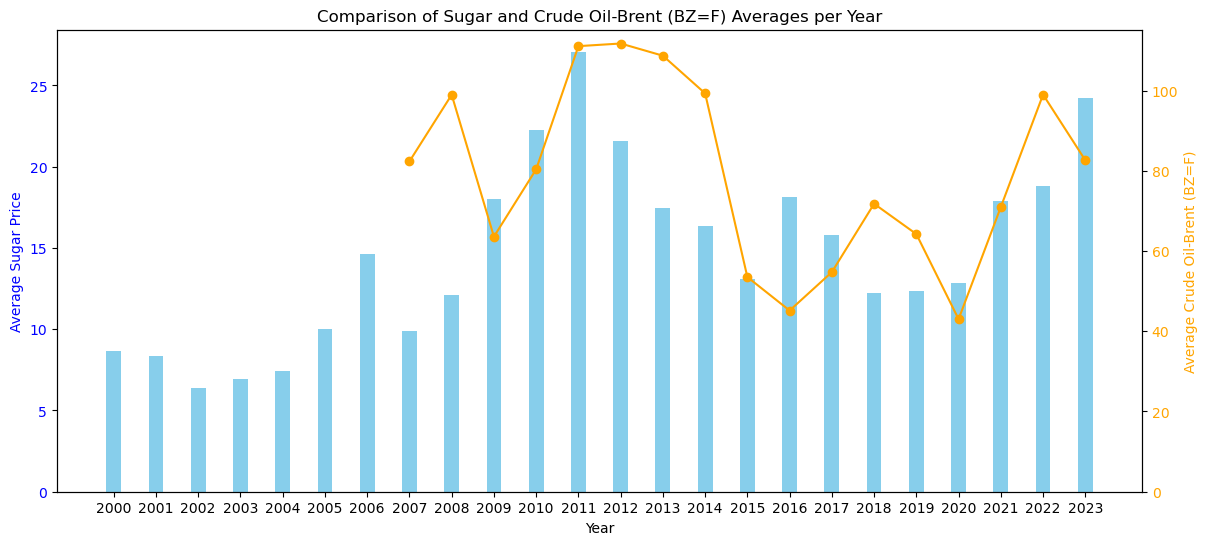

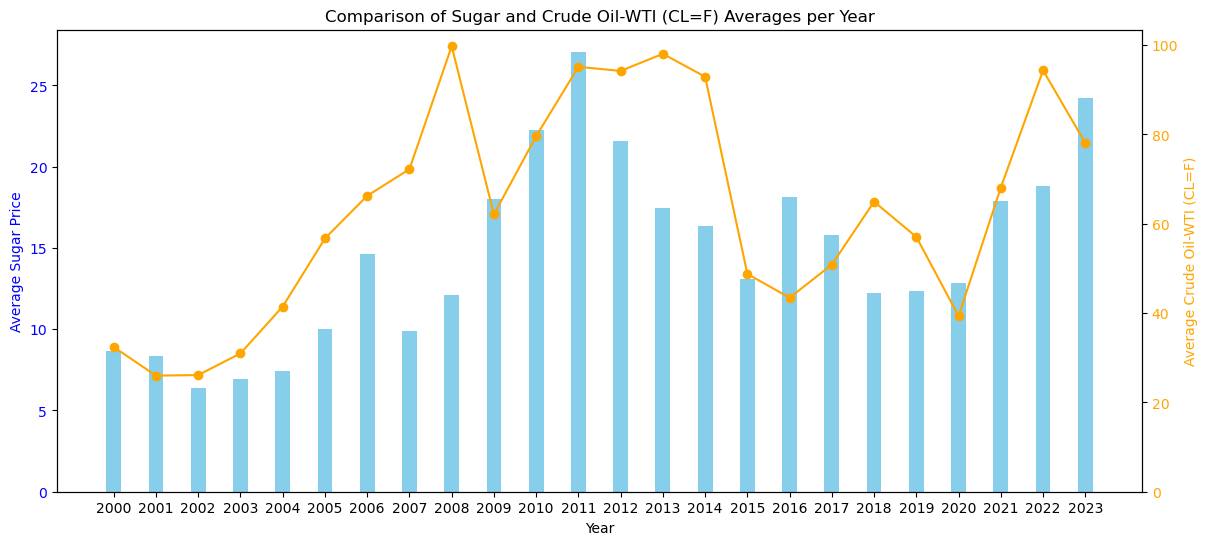

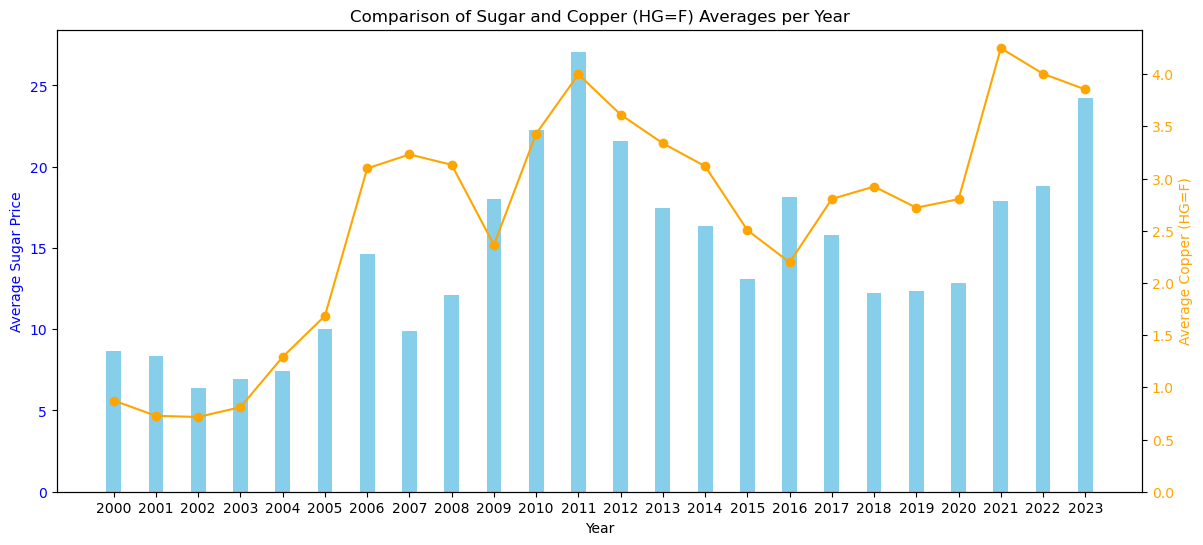

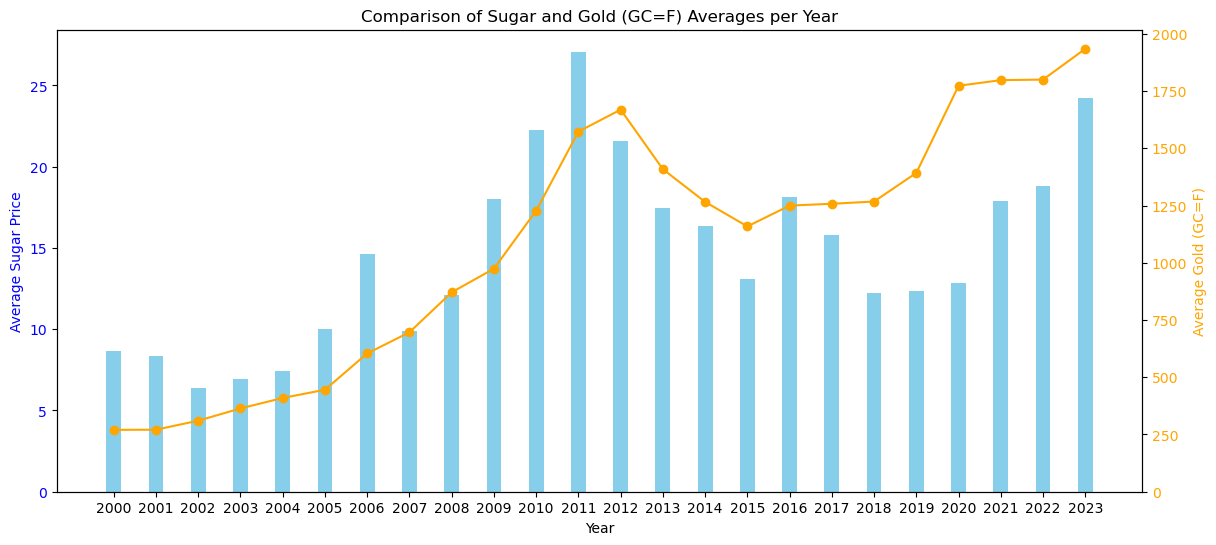

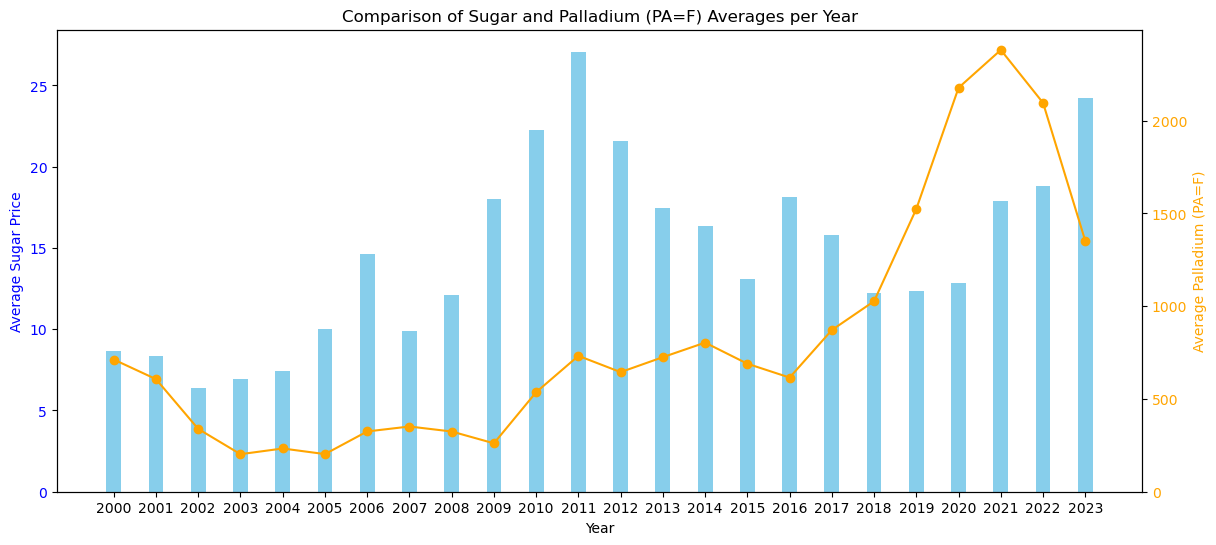

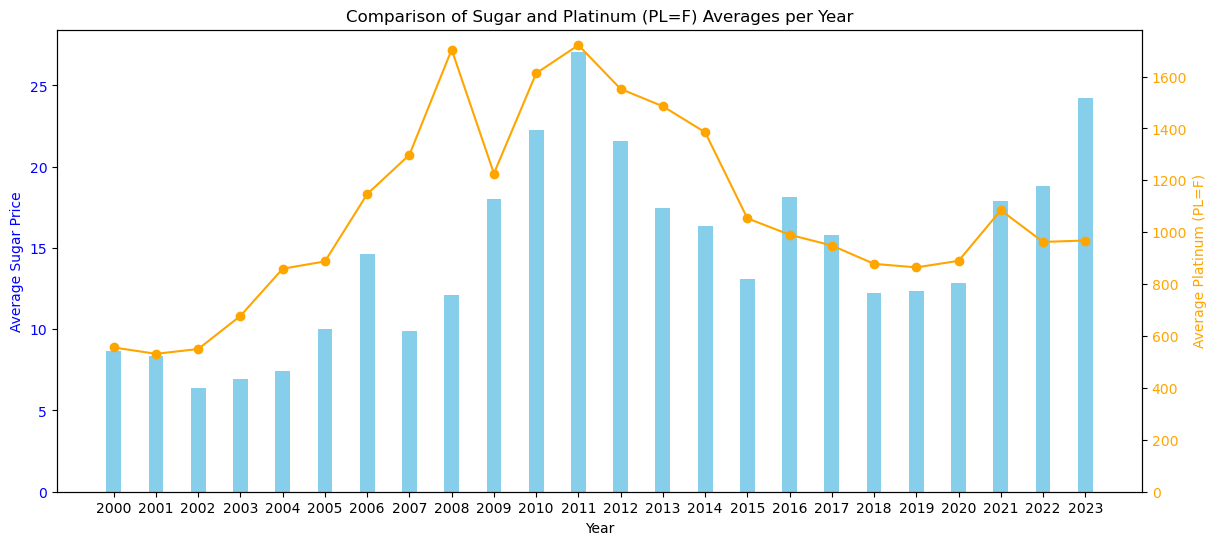

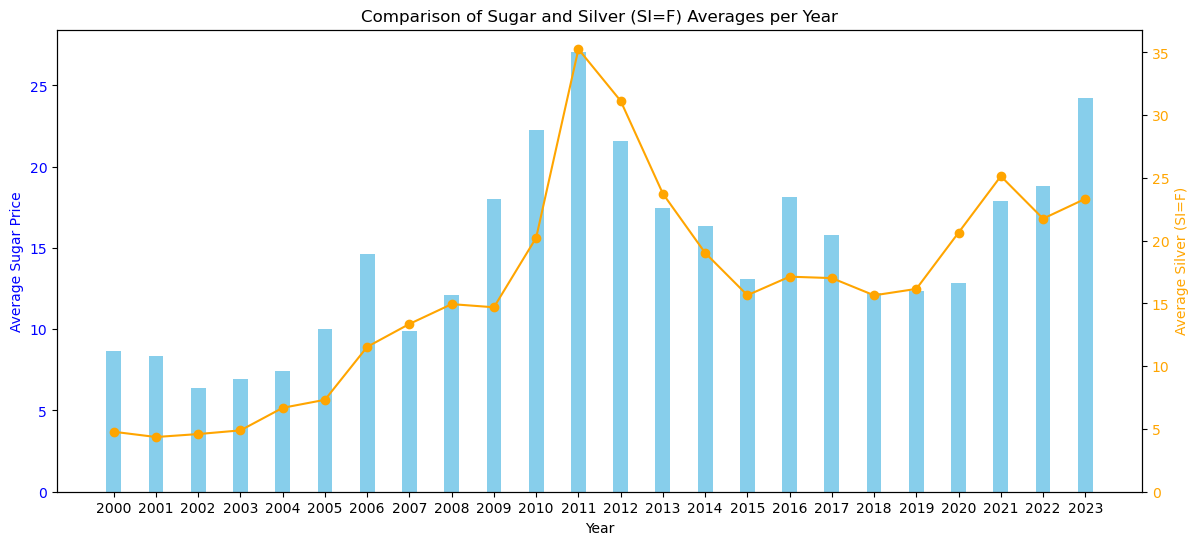

In [119]:
# Select columns for analysis
columns_of_interest = [
    'Cocoa (CC=F)', 'Coffee (KC=F)', 'Corn (ZC=F)', 'Cotton (CT=F)', 'Live Cattle (LE=F)',
    'Orange Juice (OJ=F)', 'Soybeans (ZS=F)', 'Sugar (SB=F)', 'Wheat (ZW=F)', 'Ethanol (EH=F)',
    'Heating Oil (HO=F)', 'Natural Gas (NG=F)', 'Crude Oil-Brent (BZ=F)', 'Crude Oil-WTI (CL=F)',
    'Copper (HG=F)', 'Gold (GC=F)', 'Palladium (PA=F)', 'Platinum (PL=F)', 'Silver (SI=F)',
]

# Iterate over each column for comparison with 'Sugar (SB=F)'
for column in columns_of_interest:
    # Group by year and calculate the average for 'Sugar (SB=F)' and the current column
    average_sugar_per_year = df.groupby('Year')['Sugar (SB=F)'].mean()
    average_column_per_year = df.groupby('Year')[column].mean()

    # Create a bar graph with dual y-axes and increased separation
    fig, ax1 = plt.subplots(figsize=(14, 6))  # Increased figure size

    # Plot 'Sugar (SB=F)' on the left y-axis with increased separation
    bar_width = 0.35
    bar_positions_sugar = np.arange(len(average_sugar_per_year))
    bar_positions_column = average_sugar_per_year.index.astype(str).astype(int)  # Align with numeric x-values
    ax1.bar(bar_positions_column, average_sugar_per_year, width=bar_width, color='skyblue', label='Sugar (SB=F)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Average Sugar Price', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xticks(bar_positions_column)
    ax1.set_xticklabels(average_sugar_per_year.index.astype(str))
    ax1.set_ylim(0)  # Set y-axis starting point to zero

    # Create a secondary y-axis for the current column
    ax2 = ax1.twinx()
    ax2.plot(bar_positions_column, average_column_per_year, color='orange', marker='o', label=column)
    ax2.set_ylabel(f'Average {column}', color='orange')
    ax2.tick_params(axis='y', labelcolor='orange')
    ax2.set_ylim(0)  # Set y-axis starting point to zero

    plt.title(f'Comparison of Sugar and {column} Averages per Year')
    plt.show()